In [1063]:



import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [1064]:
spacetrain=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
spacetest=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [1065]:
spacetrain.shape

(8693, 14)

In [1066]:
spacetrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1067]:
spacetrain.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

/tmp/ipykernel_32/3343400405.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spacetrain.Age)


<Axes: xlabel='Age', ylabel='Density'>

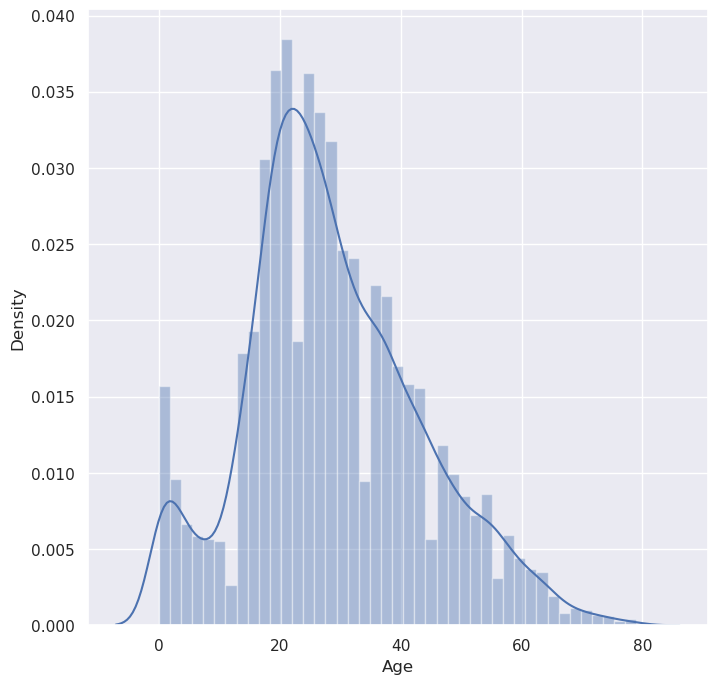

In [1068]:
# removing missing values from dataset through imputation
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(spacetrain.Age)



/tmp/ipykernel_32/2058326379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spacetrain.RoomService)


<Axes: xlabel='RoomService', ylabel='Density'>

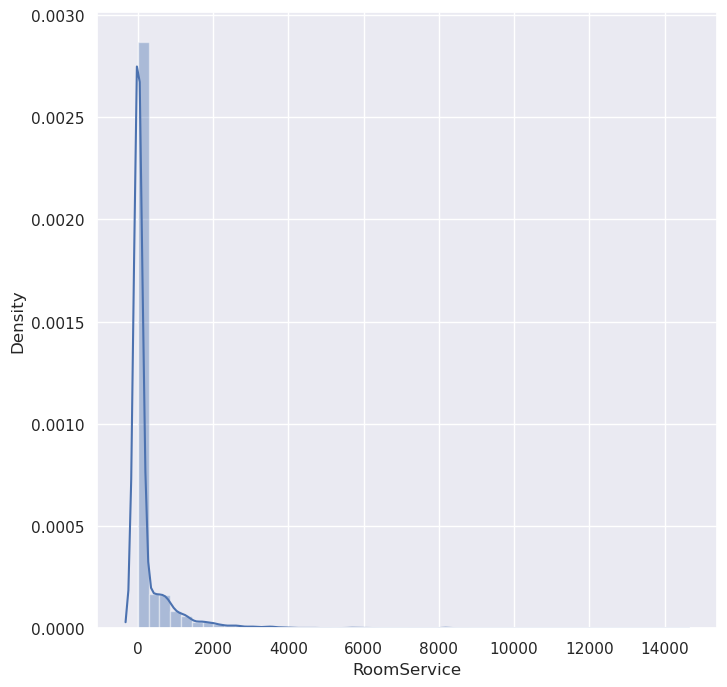

In [1069]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(spacetrain.RoomService)


In [1070]:
# removing missing values
spacetrain['HomePlanet'].fillna(spacetrain['HomePlanet'].mode()[0], inplace=True)


In [1071]:
spacetrain['CryoSleep'].fillna(spacetrain['CryoSleep'].mode()[0], inplace=True)
spacetrain['Destination'].fillna(spacetrain['Destination'].mode()[0], inplace=True)
spacetrain['FoodCourt'].fillna(spacetrain['FoodCourt'].mode()[0], inplace=True)
spacetrain['Spa'].fillna(spacetrain['Spa'].mode()[0], inplace=True)
spacetrain['VIP'].fillna(spacetrain['VIP'].mode()[0], inplace=True)
spacetrain['Cabin'].fillna(spacetrain['Cabin'].mode()[0], inplace=True)
spacetrain['ShoppingMall'].fillna(spacetrain['ShoppingMall'].mode()[0], inplace=True)
spacetrain['RoomService'].fillna(spacetrain['RoomService'].mode()[0], inplace=True)
spacetrain['VRDeck'].fillna(spacetrain['VRDeck'].mode()[0], inplace=True)

In [1072]:
spacetrain.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [1073]:
spacetrain['Age'].fillna(spacetrain['Age'].mean(), inplace=True)
spacetrain['Name'].fillna(spacetrain['Name'].mode()[0], inplace=True)

In [1074]:
spacetrain.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [1075]:
spacetrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1076]:
spacetrain.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [1077]:
spacetrain.shape

(8693, 14)

In [1078]:
#data analysis and visualisation
sns.set()


<Axes: xlabel='HomePlanet', ylabel='count'>

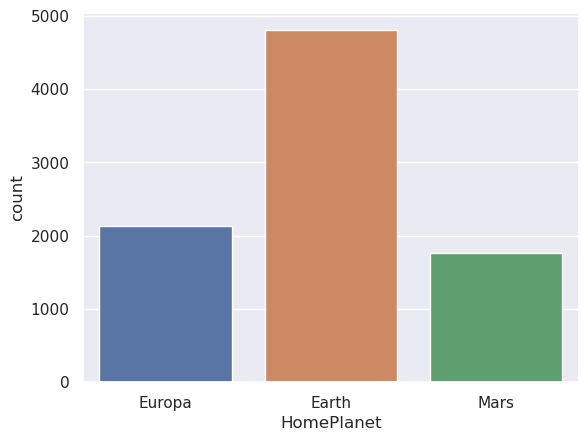

In [1079]:
sns.countplot(x='HomePlanet' ,data=spacetrain)

<Axes: xlabel='Age', ylabel='count'>

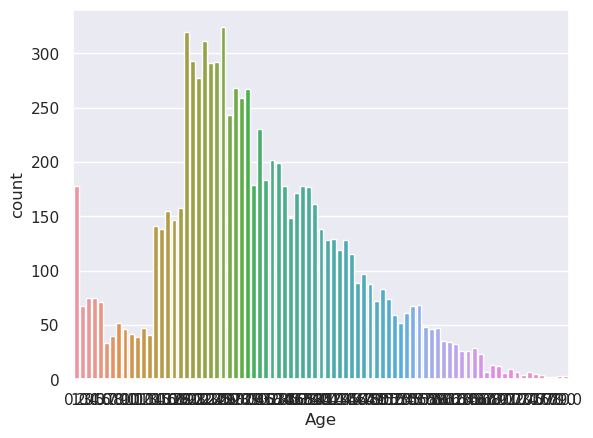

In [1080]:
sns.countplot(x='Age' ,data=spacetrain)

<Axes: xlabel='Destination', ylabel='count'>

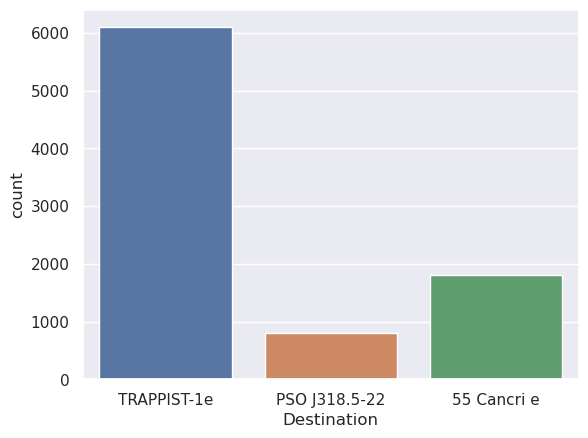

In [1081]:
sns.countplot(x='Destination' ,data=spacetrain)

<Axes: xlabel='VIP', ylabel='count'>

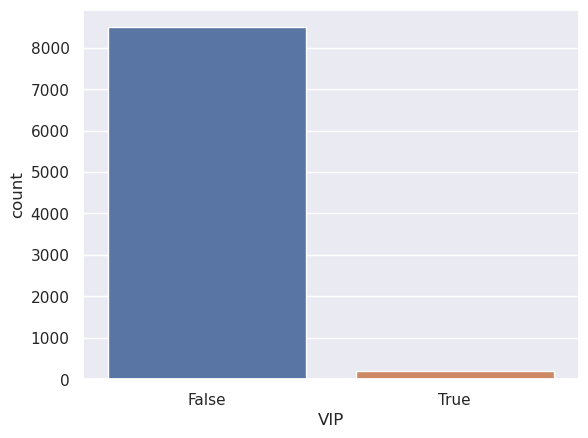

In [1082]:
sns.countplot(x='VIP' ,data=spacetrain)

<Axes: xlabel='CryoSleep', ylabel='count'>

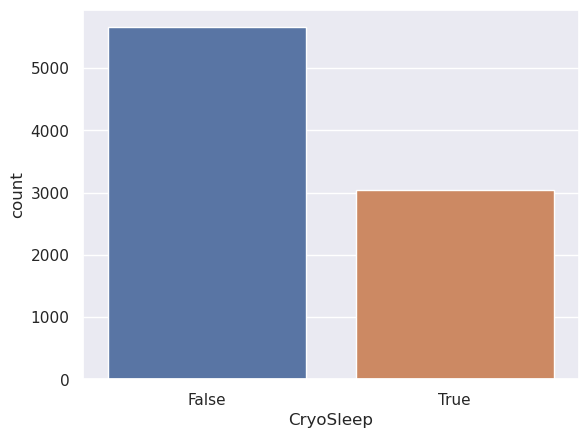

In [1083]:
sns.countplot(x='CryoSleep' ,data=spacetrain)

<Axes: xlabel='Transported', ylabel='count'>

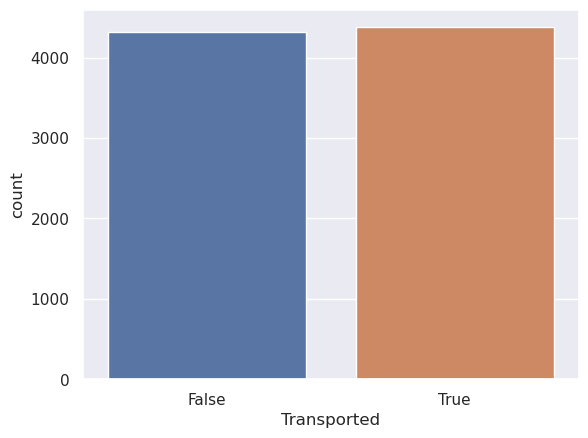

In [1084]:
sns.countplot(x='Transported' ,data=spacetrain)

In [1085]:
spacetrain.replace({'HomePlanet':{'Earth':0.0, 'Europa':1.0, 'Mars':2.0}}, inplace=True)
spacetrain.replace({'VIP':{'True':0.0, 'False':1.0}}, inplace=True)
spacetrain.replace({'Destination':{'TRAPPIST-1e':0.0, '55 Cancri e':1.0, 'PSO J318.5-22':2.0}}, inplace=True)




In [1086]:
spacetrain['HomePlanet'].value_counts()

0.0    4803
1.0    2131
2.0    1759
Name: HomePlanet, dtype: int64

In [1087]:
spacetrain['Destination'].value_counts()

0.0    6097
1.0    1800
2.0     796
Name: Destination, dtype: int64

In [1088]:
spacetrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1089]:
spacetrain.dtypes

PassengerId      object
HomePlanet      float64
CryoSleep          bool
Cabin            object
Destination     float64
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [1090]:
spacetrain['CryoSleep']=spacetrain['CryoSleep'].astype(float)
spacetrain.replace({'CryoSleep':{'True':0.0, 'False':1.0}}, inplace=True)

In [1091]:
spacetrain['VIP']=spacetrain['VIP'].astype(float)
spacetrain.replace({'VIP':{'True':0.0, 'False':1.0}}, inplace=True)

In [1092]:
spacetrain['Transported']=spacetrain['Transported'].astype(int)
spacetrain.replace({'Transported':{'True':0, 'False':1}}, inplace=True)

In [1093]:
spacetrain.dtypes

PassengerId      object
HomePlanet      float64
CryoSleep       float64
Cabin            object
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [1094]:
spacetrain.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,0.0,B/0/P,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0.0,0.0,F/0/S,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1.0,0.0,A/0/S,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1.0,0.0,A/0/S,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0.0,0.0,F/1/S,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [1095]:
#features and target
X=spacetrain.drop(columns=['PassengerId','Cabin','Name','Transported'], axis=1)
Y=spacetrain['Transported']

In [1096]:
Y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [1097]:
spacetrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,0.0,B/0/P,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0.0,0.0,F/0/S,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1.0,0.0,A/0/S,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1.0,0.0,A/0/S,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0.0,0.0,F/1/S,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [1098]:
#feature scaling
cols=['RoomService','FoodCourt','ShoppingMall','Age','Spa','VRDeck']


In [1099]:
from sklearn.preprocessing import StandardScaler

In [1100]:
st=StandardScaler()

In [1101]:
X[cols]=st.fit_transform(X[cols])

In [1102]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,0.0,0.709437,0.0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
1,0.0,0.0,0.0,-0.336717,0.0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205
2,1.0,0.0,0.0,2.034566,1.0,-0.268001,1.959998,-0.283579,5.695623,-0.219796
3,1.0,0.0,0.0,0.290975,0.0,-0.333105,0.523010,0.336851,2.687176,-0.092818
4,0.0,0.0,0.0,-0.894666,0.0,0.125652,-0.237159,-0.031059,0.231374,-0.261240
...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,1.0,0.848924,1.0,-0.333105,3.992336,-0.283579,1.189173,-0.197751
8689,0.0,1.0,2.0,-0.755179,0.0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
8690,0.0,0.0,0.0,-0.197230,0.0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003
8691,1.0,0.0,1.0,0.221232,0.0,-0.333105,0.376365,-0.283579,0.043013,2.589576


In [1103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [1104]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20, random_state=42)
    

In [1105]:
from sklearn.linear_model import LogisticRegression

In [1106]:
model=LogisticRegression()

In [1107]:
model.fit(X_train, Y_train)

LogisticRegression()

In [1108]:
y_predict=model.predict(X_test)

In [1109]:
accuracyscore=accuracy_score(Y_test,y_predict)

In [1110]:
print(accuracyscore)

0.7688326624496837


In [1111]:
avgcrossvaluescore=cross_val_score(model,X,Y,cv=5)
print(np.mean(avgcrossvaluescore))

0.7843105868153


In [1112]:
# randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

In [1113]:
model=RandomForestClassifier()

In [1114]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [1115]:
y_prediction=model.predict(X_test)

In [1116]:
forestaccuracyscore=accuracy_score(Y_test,y_prediction)

In [1117]:
print(forestaccuracyscore)

0.7780333525014376


In [1118]:
avgcrossvalue=cross_val_score(model,X,Y,cv=5)

In [1119]:
print(np.mean(avgcrossvalue))

0.7859212369581343


In [1120]:
#gradientboosting
from sklearn.ensemble import GradientBoostingClassifier

In [1121]:
model=GradientBoostingClassifier()

In [1122]:
model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [1123]:
y_predict1=model.predict(X_test)

In [1124]:
gradientboostingaccuracy=accuracy_score(Y_test,y_predict1)

In [1125]:
print(gradientboostingaccuracy)

0.7860839562967222


In [1126]:
crossgradientvalue=cross_val_score(model,X,Y,cv=5)

In [1127]:
print(np.mean(crossgradientvalue))

0.7932847006103133


In [1128]:
# hypertuning of random forest
from sklearn.model_selection import RandomizedSearchCV
RandomForestClassifier()

RandomForestClassifier()

In [1129]:
rf_grid={'n_estimators': np.arange(10,1000,10),'max_features':['auto','sqrt'],'max_depth':[None,3,5,10,20,30],'min_samples_split':[2,5,20,50,100],'min_samples_leaf':[1,2,5,10]}

In [1130]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

In [1131]:
#saving our model 
X=spacetrain.drop(columns=['PassengerId','Cabin','Name','Transported'], axis=1)
Y=spacetrain['Transported']

In [1132]:
rf=RandomForestClassifier(n_estimators=270,max_features='sqrt',max_depth=5,min_samples_split=5,min_samples_leaf=5)

In [1133]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [1134]:
import joblib

In [1135]:
joblib.dump(rf,'spacetransported')

['spacetransported']

In [1136]:
model1=joblib.load('spacetransported')

In [1137]:
df=pd.DataFrame({
    'HomePlanet':'2.0',
    'CryoSleep' :0.0,
    'Destination':'1.0',
    'Age':25.0,
    'VIP': 0.0,
    'RoomService':10.0,
    'FoodCourt':0.0,
    'ShoppingMall':18.0,
    'Spa':30.0,
    'VRDeck':0.0
    
}, index=[0])

In [1138]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2.0,0.0,1.0,25.0,0.0,10.0,0.0,18.0,30.0,0.0


In [1139]:
result=model1.predict(df)

In [1140]:
print(result)

[0]


In [1141]:
if result==0:
    print("True")
else:
    print("False")

True


In [1142]:
#loading and preprocessing test data
testing_data=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [1143]:
testing_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [1144]:
#removing missing values of testing data 
testing_data['CryoSleep'].fillna(testing_data['CryoSleep'].mode()[0], inplace=True)
testing_data['Destination'].fillna(testing_data['Destination'].mode()[0], inplace=True)
testing_data['FoodCourt'].fillna(testing_data['FoodCourt'].mode()[0], inplace=True)
testing_data['Spa'].fillna(testing_data['Spa'].mode()[0], inplace=True)
testing_data['VIP'].fillna(testing_data['VIP'].mode()[0], inplace=True)
testing_data['Cabin'].fillna(testing_data['Cabin'].mode()[0], inplace=True)
testing_data['ShoppingMall'].fillna(testing_data['ShoppingMall'].mode()[0], inplace=True)
testing_data['RoomService'].fillna(testing_data['RoomService'].mode()[0], inplace=True)
testing_data['VRDeck'].fillna(testing_data['VRDeck'].mode()[0], inplace=True)
testing_data['HomePlanet'].fillna(testing_data['HomePlanet'].mode()[0], inplace=True)
testing_data['Age'].fillna(testing_data['Age'].mean(), inplace=True)



In [1145]:
testing_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [1146]:
#encoding

testing_data.replace({'CryoSleep':{'True':0.0, 'False':1.0}}, inplace=True)

In [1147]:
testing_data.replace({'VIP':{'True':0.0, 'False':1.0}}, inplace=True)

In [1148]:
testing_data.replace({'Destination':{'TRAPPIST-1e':0.0, '55 Cancri e':1.0, 'PSO J318.5-22':2.0}}, inplace=True)

In [1149]:
testing_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination     float64
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [1150]:
testing_dataX=testing_data.drop(columns=['PassengerId','Cabin','Name'], axis=1)

In [1151]:
#testing_data['CryoSleep']=testing_data['CryoSleep'].astype('float64')
testing_data.replace({'CryoSleep':{'True':0.0, 'False':1.0},
                      'HomePlanet':{'Europa':0.0, 'Earth':1.0,'Mars':2.0},
                      'VIP':{'True':0, 'False':1},
                       'Destination':{'TRAPPIST-1e':0.0, '55 Cancri e':1.0, 'PSO J318.5-22':2.0}}, 
                    inplace=True)
#testing_data['HomePlanet']=testing_data['HomePlanet'].astype('float64')
#testing_data.replace({'HomePlanet':{'Europa':0.0, 'Earth':1.0,'Mars':2.0}}, inplace=True)
#testing_data['VIP']=testing_data['VIP'].astype('int32')
#testing_data.replace({'VIP':{'True':0, 'False':1}}, inplace=True)
#testing_data['Age']=testing_data['Age'].astype(float)


In [1152]:
testing_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,1.0,True,G/3/S,0.0,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,1.0,False,F/4/S,0.0,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,0.0,True,C/0/S,1.0,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,0.0,False,C/1/S,0.0,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,1.0,False,F/5/S,0.0,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1.0,True,G/1496/S,0.0,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,1.0,False,G/160/P,0.0,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,2.0,True,D/296/P,1.0,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,0.0,False,D/297/P,0.0,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1153]:
testing_dataX=testing_data.drop(columns=['PassengerId','Cabin','Name'], axis=1)

In [1154]:
testing_dataX

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,True,0.0,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,1.0,False,0.0,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0.0,True,1.0,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0.0,False,0.0,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,1.0,False,0.0,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,1.0,True,0.0,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,1.0,False,0.0,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,2.0,True,1.0,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,0.0,False,0.0,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [1155]:
test_prediction=model.predict(testing_dataX)

In [1156]:
test_prediction.dtype

dtype('int64')

In [1160]:
tf1=test_prediction.astype(bool)

In [1161]:
output=pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Transported':tf1})

In [1162]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [1163]:
output.to_csv('submission1.csv', index=False)
print("Submission saved successfully")

Submission saved successfully
